Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB10

Use reinforcement learning to devise a tic-tac-toe player.

### Deadlines:

* Submission: [Dies Natalis Solis Invicti](https://en.wikipedia.org/wiki/Sol_Invictus)
* Reviews: [Befana](https://en.wikipedia.org/wiki/Befana)

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [12]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

from tqdm.auto import tqdm
import numpy as np

In [13]:
State = namedtuple('State', ['x', 'o'])

In [14]:
MAGIC = [2, 7, 6, 9, 5, 1, 4, 3, 8]

In [15]:
def print_board(pos):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            i = r * 3 + c
            if MAGIC[i] in pos.x:
                print('X', end='')
            elif MAGIC[i] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()

Copyright **`(c)`** 2023 Gabriele Ferro `<gabrieleferro.00@gmail.com>`  
[`https://github.com/Gabbo62/ComputationalIntelligence`](https://github.com/Gabbo62/ComputationalIntelligence) ~ 
[`LICENSE`](https://github.com/Gabbo62/ComputationalIntelligence/blob/master/LICENSE)

In [16]:
def win(elements):
    """Checks is elements is winning"""
    return any(sum(c) == 15 for c in combinations(elements, 3))

# Return the result of the game if finished, 0 otherwise. 1 x win, -1 o win, 0.5 no winner
def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    elif len(pos.x) + len(pos.o) == 9:
        return 0.5
    else:
        return 0

## Q Learning  
Using `MAGIC` translation

In [17]:
LEARNING_RATE = 0.9
DISCOUNT_RATE = 0.75

In [18]:
from typing import List, Tuple, Dict

def random_game():
    '''
        Play in a random way for both the players. 
    '''
    # Keep a different trajectory for the two players
    trajectory_x: List[Tuple[State, int]] = list()
    trajectory_o: List[Tuple[State, int]] = list()
    
    state = State(set(), set())
    available = set(range(1, 9+1))
    
    while available:
        x = choice(list(available))
        state.x.add(x)
        trajectory_x.append((deepcopy(state), x))
        available.remove(x)
        if win(state.x) or not available:
            # print(f'break x {state}')
            break

        o = choice(list(available))
        state.o.add(o)
        trajectory_o.append((deepcopy(state), o))
        available.remove(o)
        if win(state.o):
            # print(f'break o {state}')
            break
    return trajectory_x, trajectory_o

In [19]:
def hashable_state(state: State) -> State:
    '''
        Transfor the state in an hashable state to access a disctonary
    '''
    return State(frozenset(state.x), frozenset(state.o))

In [106]:
# Train the Q function considering both the players to update it
def training(
    Q_function: Dict[State, Dict[int, float]],
    train_size: int = int(1e5),
    learning_rate: float = 0.9,
    discount_rate: float = 0.75,
):
    win_perc = 0
    for i in range(train_size):
        traj_x, traj_o = random_game()

        # Extract the result
        win_x = state_value(traj_x[-1][0])
        win_o = state_value(traj_o[-1][0])

        reward = -1 if -1 in [win_x, win_o] else max(win_x, win_o)

        win_perc += 1 if reward == 1 else 0

        # Update the Q function with respect to x moves
        for state, move in traj_x:
            state_to_update = hashable_state(State(state.x - set([move]), state.o))
            next_state = hashable_state(State(state.o, state.x))

            l = [i for i in Q_function[next_state].values()]
            if len(l) == 0:
                l.append(0.0)
            max_move = min(l)
            # max_move = .0

            Q_function[state_to_update][move] += learning_rate * (
                float(reward)
                + discount_rate * max_move
                - Q_function[state_to_update][move]
            )

        # Update the Q function with respect to o moves
        for state, move in traj_o:
            state_to_update = hashable_state(State(state.o - set([move]), state.x))
            next_state = hashable_state(State(state.x, state.o))

            l = [i for i in Q_function[next_state].values()]
            if len(l) == 0:
                l.append(0.0)
            max_move = min(l)
            # max_move = .0

            Q_function[state_to_update][move] += learning_rate * (
                float(-reward)
                + discount_rate * max_move
                - Q_function[state_to_update][move]
            )

    return float(win_perc) / float(train_size)


In [97]:
# Train the Q function considering both the players to update it
def training_2(
    Q_function: Dict[State, Dict[int, float]],
    train_size: int = int(1e5),
    learning_rate: float = 0.9,
    discount_rate: float = 0.75
):
    win_perc = 0
    for i in range(train_size):
        traj_x, traj_o = random_game()

        # Extract the result
        win_x = state_value(traj_x[-1][0])
        win_o = state_value(traj_o[-1][0])

        reward = -1 if -1 in [win_x, win_o] else max(win_x, win_o)

        win_perc += 1 if reward == 1 else 0

        # Update the Q function with respect to x moves
        for state, move in traj_x:
            state_to_update = hashable_state(State(state.x - set([move]), state.o))
            next_state = hashable_state(State(state.o, state.x))

            l = [i for i in Q_function[next_state].values()]
            if len(l) == 0:
                l.append(0.0)
            max_move = min(l)
            # max_move = .0

            Q_function[state_to_update][move] = (1 - learning_rate) * Q_function[
                state_to_update
            ][move] + learning_rate * (float(reward) + discount_rate * max_move)

        # Update the Q function with respect to o moves
        for state, move in traj_o:
            state_to_update = hashable_state(State(state.o - set([move]), state.x))
            next_state = hashable_state(State(state.x, state.o))

            l = [i for i in Q_function[next_state].values()]
            if len(l) == 0:
                l.append(0.0)
            max_move = min(l)
            # max_move = .0

            Q_function[state_to_update][move] = (1 - learning_rate) * Q_function[
                state_to_update
            ][move] + learning_rate * (float(-reward) + discount_rate * max_move)

    return float(win_perc) / float(train_size)


In [27]:
def play_game(Q_function, starting: bool = True) -> int:
    '''
        Play a game with one player random and the other based on Q function
    '''
    state = State(set(), set())
    available = set(range(1, 9 + 1))

    while available:
        if starting:
            starting = not starting
            # Move choice. If none of the studied moves are availlable a random one is chosen
            h_state = hashable_state(state)
            x = [
                i[0]
                for i in Q_function[h_state].items()
                if i[0] in available
                and i[1] == max(Q_function[h_state].values())
                and i[1] > 0
            ]
            x = x[0] if x else choice(list(available))
            
            state.x.add(x)
            available.remove(x)
            if win(state.x) or not available:
                break
        
        else:
            starting = not starting
            # Random choice for o
            o = choice(list(available))
            state.o.add(o)
            available.remove(o)
            if win(state.o):
                break

    return state_value(state)


In [28]:
NUM_GAMES = 100
Q_function = defaultdict(lambda: defaultdict(float))

tot = 0
for _ in range(NUM_GAMES):
    tot += 1 if play_game(Q_function) == 1 else 0
    
print(tot)

61


In [111]:
import matplotlib.pyplot as plt


def training_epochs_graph(
    train_function,
    play_function,
    n_training: int = 6,
    learning_rate: float = 0.9,
    discount_rate: float = 0.75,
) -> None:
    """
    Graph the game win percentage with `n_training` powers of 10
    """
    train_size_set = [10**i for i in range(n_training)]
    win_set = []
    lose_set = []
    even_set = []

    for t_size in train_size_set:
        Q_function = defaultdict(lambda: defaultdict(float))
        win = 0
        lose = 0
        even = 0

        train_function(Q_function, t_size, learning_rate, discount_rate)

        for i in range(NUM_GAMES):
            starting_turn = i % 2 == 0
            res = play_function(Q_function, starting_turn)

            win += 1 if res == 1 else 0
            lose += 1 if res == -1 else 0
            even += 1 if res == 0.5 else 0

        win_set.append(win / NUM_GAMES * 100.0)
        lose_set.append(lose / NUM_GAMES * 100.0)
        even_set.append(even / NUM_GAMES * 100.0)

    print(win_set, lose_set)
    plt.plot(train_size_set, win_set)
    plt.plot(train_size_set, lose_set)
    plt.plot(train_size_set, even_set)
    plt.xscale("log")

    plt.ylabel("win percentage")
    plt.xlabel("#training epochs")
    plt.legend(["x", "o", "None"])
    plt.grid(True)

    plt.show


In [117]:
import numpy as np
import itertools

def training_param_graph(
    train_function,
    play_function,
    train_size: int = 6,
    n_learning_rates: int = 10,
    n_discount_rates: int = 10,
    n_games: int = 100,
    min_lr: float = 0.0,
    max_lr: float = 1.0,
    min_dr: float = 0.0,
    max_dr: float = 1.5
) -> None:
    '''
        Graph the win percentage for different values of learning rate and discount rate
    '''
    lr_set = np.linspace(min_lr, max_lr, n_learning_rates)
    dr_set = np.linspace(min_dr, max_dr, n_discount_rates)
    pair_set = [i for i in itertools.product(lr_set, dr_set)]
    
    win_set = []
    lose_set = []
    even_set = []
    
    for lr, dr in tqdm(pair_set):
        Q_function = defaultdict(lambda: defaultdict(float))
        win = 0
        lose = 0
        even = 0
        
        train_function(Q_function, 10**train_size, lr, dr)
        
        for i in range(n_games):
            starting_turn = i % 2 == 0
            res = play_function(Q_function, starting_turn)
            
            win += 1 if res == 1 else 0
            lose += 1 if res == -1 else 0
            even += 1 if res == .5 else 0
            
        win_set.append(win/NUM_GAMES*100.0)
        lose_set.append(lose/NUM_GAMES*100.0)
        even_set.append(even/NUM_GAMES*100.0)
        
    x_axis = [i for i in range(n_learning_rates*n_discount_rates)]
    print(win_set)
    
    plt.plot(x_axis, win_set)
    plt.plot(x_axis, lose_set)
    plt.plot(x_axis, even_set)
    plt.xticks(x_axis, pair_set, rotation='vertical')
    
    plt.ylabel('win percentage')
    plt.xlabel('(learning rate, discount rate)')
    plt.legend(['x', 'o', 'None'])
    plt.grid(True)
    
    plt.show

[46.0, 49.0, 41.0, 56.00000000000001, 84.0, 84.0] [41.0, 36.0, 52.0, 37.0, 11.0, 11.0]


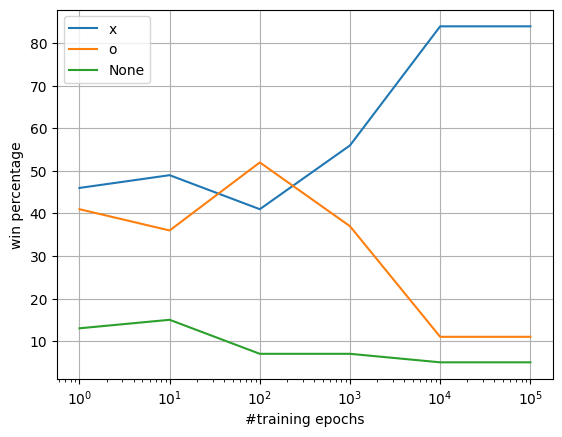

In [128]:
# training_param_graph(
#     training,
#     play_game,
#     train_size=5,
#     n_learning_rates=4,
#     n_discount_rates=4,
#     min_lr=0.2,
#     max_lr=0.8,
#     min_dr=0.0,
#     max_dr=0.7,
# )

training_epochs_graph(training, play_game, learning_rate= 0.8, discount_rate= 0.0, n_training=6)